In [31]:
import torch
from torchvision import datasets, transforms

from torch import nn, optim
from torch.utils.data import DataLoader, Subset

from torch.quantization import QuantStub, DeQuantStub, prepare, convert, default_qconfig

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((.5,), (.5,))])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
subset = list(range(5000))
train_subset = Subset(trainset, subset)
trainloader = torch.utils.data.DataLoader(train_subset, batch_size=64, shuffle=True)

testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [32]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [33]:
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = .03, momentum = .9)

In [34]:
for epoch in range(15):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.view(inputs.shape[0], -1)
        optimizer.zero_grad()
    
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
    
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')


Epoch 1, Loss: 0.7858594897427137
Epoch 2, Loss: 0.39676943308190454
Epoch 3, Loss: 0.2761444578631015
Epoch 4, Loss: 0.2099626424097562
Epoch 5, Loss: 0.16062164268916165
Epoch 6, Loss: 0.13405491680472711
Epoch 7, Loss: 0.10562678094057343
Epoch 8, Loss: 0.08960638736386466
Epoch 9, Loss: 0.09937550712235366
Epoch 10, Loss: 0.06388059040366471
Epoch 11, Loss: 0.060224120446209665
Epoch 12, Loss: 0.032757663536416015
Epoch 13, Loss: 0.030282231255528765
Epoch 14, Loss: 0.02202826949526096
Epoch 15, Loss: 0.014553435276486452


In [42]:
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = .03, momentum = .9)

In [43]:
from PIL import Image
import torchvision.transforms as transforms
import torch

# Load image from file
image_path = 'to_classify.png'
image = Image.open(image_path)

# Transform pipeline
transform = transforms.Compose([
    transforms.Grayscale(),       # Convert to grayscale
    transforms.Resize((28, 28)),  # Resize to 28x28 pixels
    transforms.ToTensor(),        # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize
])

# Apply transform to the image
input_tensor = transform(image)
input_tensor = input_tensor.unsqueeze(0)  # Add batch dimension


In [44]:
image

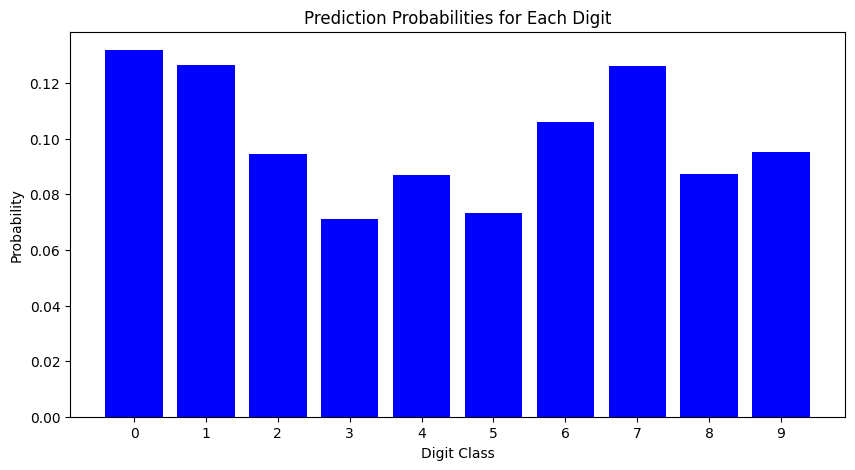

In [45]:
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    output = model(input_tensor)
    probabilities = torch.nn.functional.softmax(output, dim=1).squeeze()  # Apply softmax and remove extra dimensions
    
    # Create a bar graph
    labels = list(range(10))  # Labels for each class (0-9)
    plt.figure(figsize=(10, 5))
    plt.bar(labels, probabilities.numpy(), color='blue')  # Convert probabilities to NumPy array for plotting
    plt.xlabel('Digit Class')
    plt.ylabel('Probability')
    plt.title('Prediction Probabilities for Each Digit')
    plt.xticks(labels)  # Ensure x-ticks are correctly labeled
    plt.show()